<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import pyupbit

In [79]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-waves", interval="minute15")
df

,open,high,low,close,volume,value
2022-09-03 16:00:00,6210.0,6260.0,6170.0,6205.0,2.327853e+05,1.446072e+09
2022-09-03 17:00:00,6205.0,6215.0,6180.0,6190.0,6.143539e+04,3.803566e+08
2022-09-03 18:00:00,6190.0,6205.0,6165.0,6205.0,6.104308e+04,3.773121e+08
2022-09-03 19:00:00,6205.0,6215.0,6195.0,6215.0,3.950682e+04,2.450916e+08
2022-09-03 20:00:00,6215.0,6225.0,6195.0,6205.0,8.231801e+04,5.114037e+08
...,...,...,...,...,...,...
2022-09-11 19:00:00,6805.0,6830.0,6775.0,6790.0,5.277064e+05,3.585348e+09
2022-09-11 20:00:00,6790.0,6805.0,6735.0,6735.0,8.343247e+05,5.645515e+09
2022-09-11 21:00:00,6735.0,6760.0,6680.0,6715.0,1.057653e+06,7.101978e+09
2022-09-11 22:00:00,6715.0,6720.0,6670.0,6700.0,5.614358e+05,3.756368e+09


In [80]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-03 16:00:00,6205.0
1,2022-09-03 17:00:00,6190.0
2,2022-09-03 18:00:00,6205.0
3,2022-09-03 19:00:00,6215.0
4,2022-09-03 20:00:00,6205.0
...,...,...
195,2022-09-11 19:00:00,6790.0
196,2022-09-11 20:00:00,6735.0
197,2022-09-11 21:00:00,6715.0
198,2022-09-11 22:00:00,6700.0


In [81]:
#prophet 불러옴
from fbprophet import Prophet

In [82]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [83]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=25, freq='H')
forecast = model.predict(future)

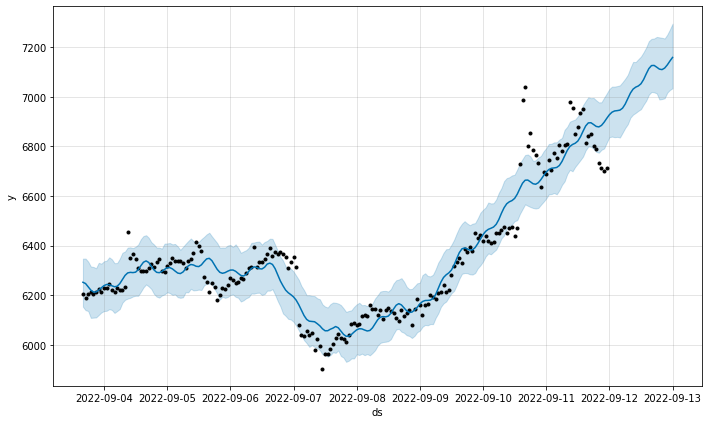

In [84]:
#그래프1
fig1 = model.plot(forecast)

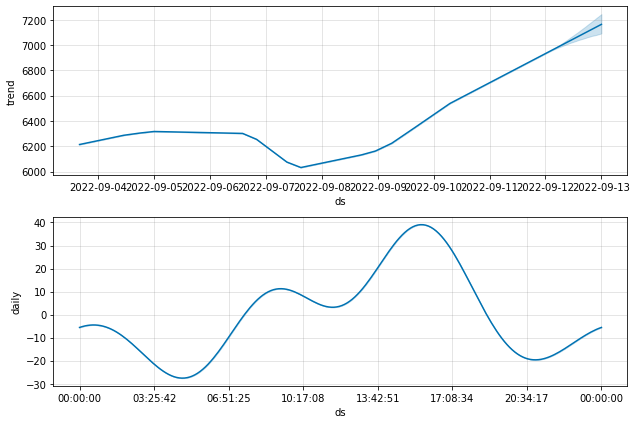

In [85]:
 #그래프2
fig2 = model.plot_components(forecast)